## Redes Neuronales Profundas: clasificación de imágenes

Juan Manuel García Moyano
Tareas a realizar:
* Comenta el código que esté sin comentar (realizado)
* Diseña varias RNP con distintas capas y parámetros.
* Representa graficamente los resultados de los modelos probados.
* Prueba el mejor de los modelos con datos reales.

### Importamos las librerías necesarias

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### Carga de los datos
Vamos a utilizar el propio dataset que viene precargado en Keras:
https://keras.io/api/datasets/fashion_mnist/
<br>
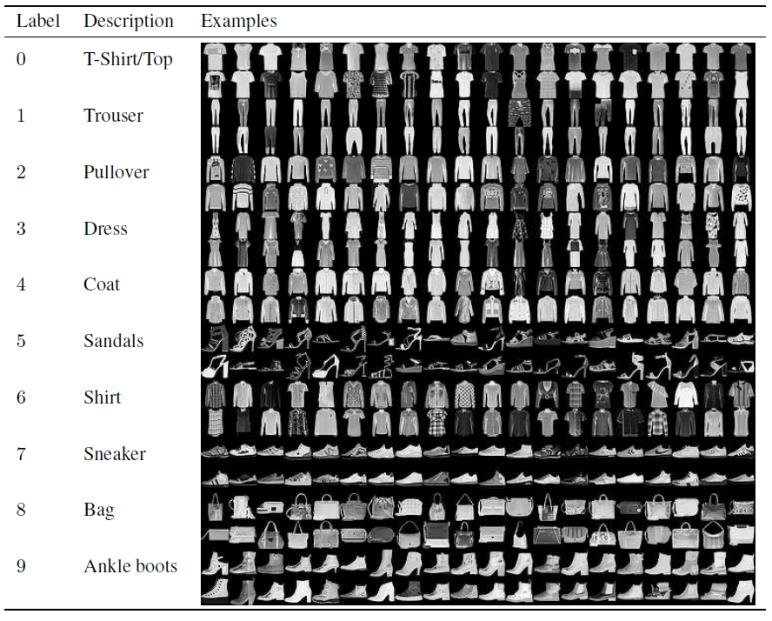

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Exploración y visualización de los datos
Utilizamos len, shape e imshow para explorar y ver con qué estamos trabajando.


In [ ]:
# El conjunto de muestras de entrenamiento estará compuesto por 60k imágenes de 28x28 píxeles
train_images.shape

(60000, 28, 28)

In [ ]:
# El conjunto de muestras de test estará compuesto por 10k imágenes también de 28x28 píxeles
test_images.shape

(10000, 28, 28)

In [ ]:
# Cada imagen tendrá su etiqueta indicando la clase/categoría
print("Entrenamiento:",len(train_labels))
print("Test:",len(test_labels))

Entrenamiento: 60000
Test: 10000


In [ ]:
# Dichas etiquetas serán un número del 0 al 9
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
# Que tendrán correspondencia con las siguientes clases ya traducidas.
class_names = ['Camiseta/top', 'Pantalón', 'Jersey', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Botín']

for i in range(9):
  print("Clase ",i,": ",class_names[i],sep="")

Clase 0: Camiseta/top
Clase 1: Pantalón
Clase 2: Jersey
Clase 3: Vestido
Clase 4: Abrigo
Clase 5: Sandalia
Clase 6: Camisa
Clase 7: Zapatilla
Clase 8: Bolso


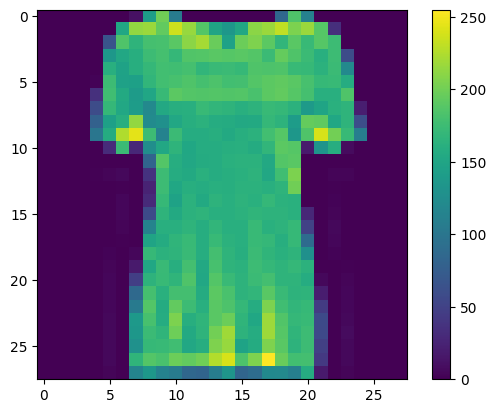

In [ ]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()


In [ ]:
# Si observamos una muestra en particular veremos como realmente es una matriz 28x28
# de números enteros entre 0 255
#print(train_images[10])

In [ ]:
# Normalizamos las muestras
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
# Si observamos una muestra en particular después de normalizar veremos como sus valores
# estarán entre 0 y 1
#print(train_images[10])

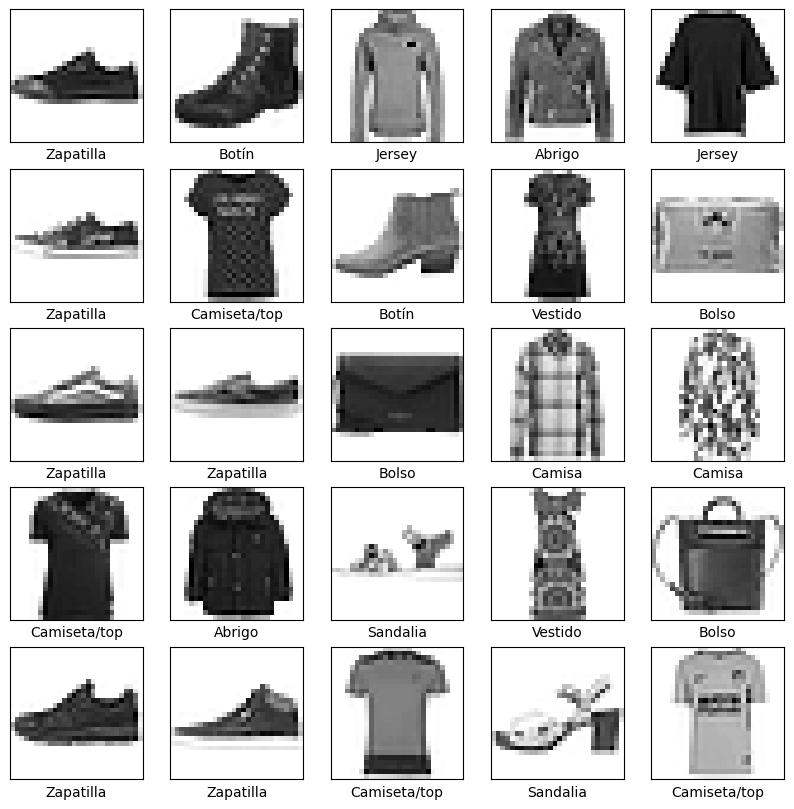

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  imagen_aleatoria=random.randrange(0, len(train_labels)-1)
  plt.imshow(train_images[imagen_aleatoria], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[imagen_aleatoria]])

# El método show no es necesario en colab
#plt.show

## Construcción del modelo
Llamamos a la clase Sequential y usamos layers para crear las capas. Con Dense, se crean las capas de red neuronal. Utilizaremos las funciones de activación ReLu en las capas internas y Softmax en la de salida.

Pista: Flatten crea una capa que reduce a 1 la dimensión del array de las imágenes

In [ ]:
model = keras.Sequential([
   keras.layers.Flatten(input_shape = (28,28)),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(10, activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## Parámetros del entrenamiento
El método compile nos permite configurar el optimizador, función de coste,etc. En este caso, vamos a recurrir al optimizador Adam, y la función de coste sparse_categorical_crossentropy.

In [ ]:
model.compile(optimizer= 'Adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

## Entrenamiento del modelo
Utilizamos la función fit para el entrenamiento de la DNN. <br>
Tenemos que pasar como argumento:
* train_images -> imágenes para entrenar la red.
* train_labels -> etiquetas/clases de las imágenes de entrenamiento.
* batch_size -> número de clasificaciones que se evalúan antes de actualizar el peso en la red
* epochs -> número de épocas del entrenamiento
* validation_split -> porcentaje de muestras de entrenamiento utilizadas para la validación.

In [ ]:
#model.fit(train_images,train_labels,epochs=5)

history = model.fit(train_images,train_labels,
                    batch_size= 32,
                    epochs= 20,
                    validation_split=0.2
                   )
#Partíamos de 60000 imágenes para el entrenamiento, hemos reservado en 20% para la valida

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8976 - loss: 0.2692 - val_accuracy: 0.8784 - val_loss: 0.3392
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9076 - loss: 0.2469 - val_accuracy: 0.8912 - val_loss: 0.3112
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9106 - loss: 0.2377 - val_accuracy: 0.8847 - val_loss: 0.3289
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9157 - loss: 0.2268 - val_accuracy: 0.8829 - val_loss: 0.3328
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9159 - loss: 0.2204 - val_accuracy: 0.8862 - val_loss: 0.3187
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9191 - loss: 0.2154 - val_accuracy: 0.8871 - val_loss: 0.3339
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9252 - loss: 0.2012 - val_accuracy: 0.8914 - val_loss: 0.3260
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9257 - loss: 0.2000 

Partíamos de 60000 imágenes para el entrenamiento, hemos reservado en 20% para la validación durante el entrenamiento, por lo que nos quedan 48000 imágenes para realizad dicho entrenamiento. En cada época se procesarán todas las imágenes, como lo hacemos en lotes de 32, necesitaremos 1500 lotes en cada época. (32x1500=48000)

**¿Cómo interpretar los datos del entrenamiento?**

**accuracy:** es la precisión calculada en el conjunto de entrenamiento (datos que el modelo ha podido ver con anterioridad).

**val_acc:** es la precisión calculada en el conjunto de validación (es decir, sobre datos que el modelo "nunca ha visto").

**loss:** es la pérdida de la función de costo para el conjunto de entrenamiento.

**val_loss:** es la pérdida de la función de costo para el conjunto de validación cruzada.

## Evaluación del modelo
Para evaluar el modelo, recurrimos a la función evaluate y guardamos los valores que nos devuelve, el error o loss, y la precisión o accuracy.

In [ ]:
test_loss,test_acc = model.evaluate(test_images,test_labels)

print('Test accuracy: ', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8798 - loss: 0.4183
Test accuracy:  0.8804000020027161


## Generación del modelo predictivo y pruebas
Con la función predict, generamos la colección de resultados del modelo para nuevos datos de entrada, y podemos analizar su comportamiento.

In [ ]:
predictions = model.predict(test_images)
predictions


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[1.9825778e-08, 5.6016632e-12, 3.0702760e-13, ..., 1.5773745e-03,
        8.4015500e-10, 9.9838144e-01],
       [2.2353936e-07, 2.6512361e-18, 9.9978495e-01, ..., 1.9088170e-21,
        6.5273913e-19, 8.9492450e-22],
       [1.1565781e-15, 9.9999994e-01, 4.7270217e-22, ..., 3.3584085e-31,
        1.5712292e-23, 6.4442226e-26],
       ...,
       [4.6057416e-05, 2.5915269e-17, 5.3817335e-08, ..., 2.8009040e-15,
        9.9995106e-01, 7.4087595e-23],
       [5.2931462e-14, 9.9999994e-01, 7.1603923e-19, ..., 3.6891411e-29,
        1.4393057e-18, 5.5703989e-18],
       [2.0687317e-08, 2.3539809e-10, 5.3092325e-10, ..., 1.6152138e-05,
        8.6652449e-08, 4.0258566e-08]], dtype=float32)

La muestra número 1 del tipo Jersey, ha sido correctamente clasificada. 
clase: Camiseta/top -> probabilidad 0.0
clase: Pantalón -> probabilidad 0.0
clase: Jersey -> probabilidad 99.98
clase: Vestido -> probabilidad 0.0
clase: Abrigo -> probabilidad 0.02
clase: Sandalia -> probabilidad 0.0
clase: Camisa -> probabilidad 0.0
clase: Zapatilla -> probabilidad 0.0
clase: Bolso -> probabilidad 0.0
clase: Botín -> probabilidad 0.0


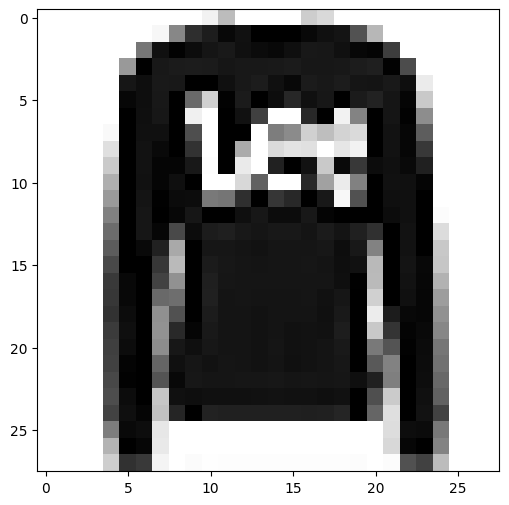

In [ ]:
muestra=1

clase_muestra = class_names[test_labels[muestra]]
prediccion_muestra=class_names[np.argmax(predictions[muestra])]

if prediccion_muestra == clase_muestra:
    print("La muestra número "+str(muestra)+" del tipo "+clase_muestra+", ha sido correctamente clasificada. ")
else:
    print("La muestra número "+str(muestra)+", del tipo "+clase_muestra+", ha sido clasificada como "+prediccion_muestra)

i=0;
for clase in class_names:
    print("clase: "+clase+" -> probabilidad "+str(round(predictions[muestra][i]*100,2)) )
    i=i+1

plt.figure()
plt.imshow(test_images[muestra], cmap = plt.cm.binary)



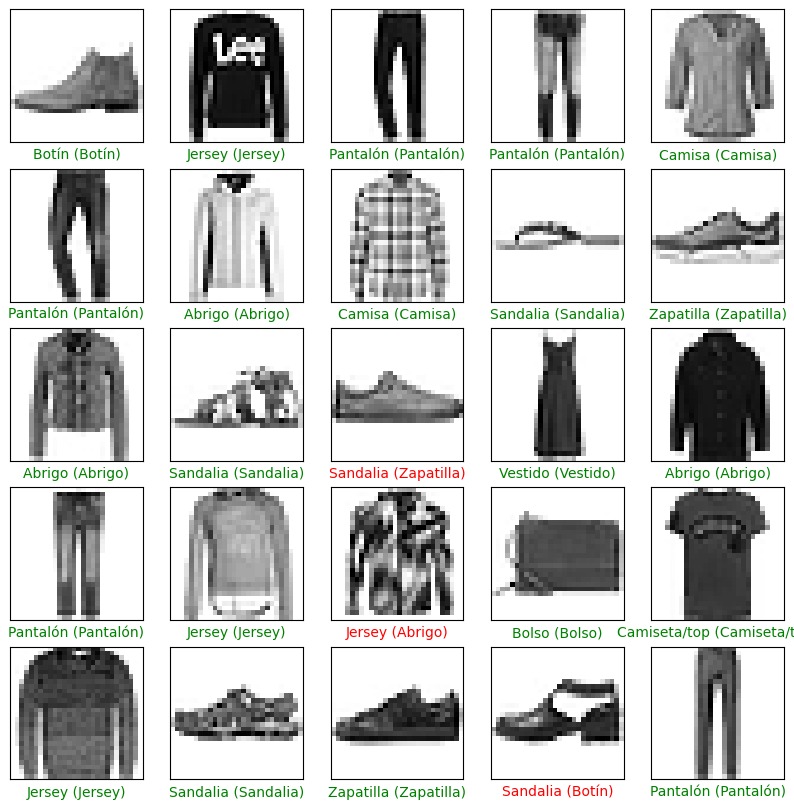

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(test_images[i],cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} ({})".format(class_names[predicted_label],
                              class_names[true_label]),
                              color=color)

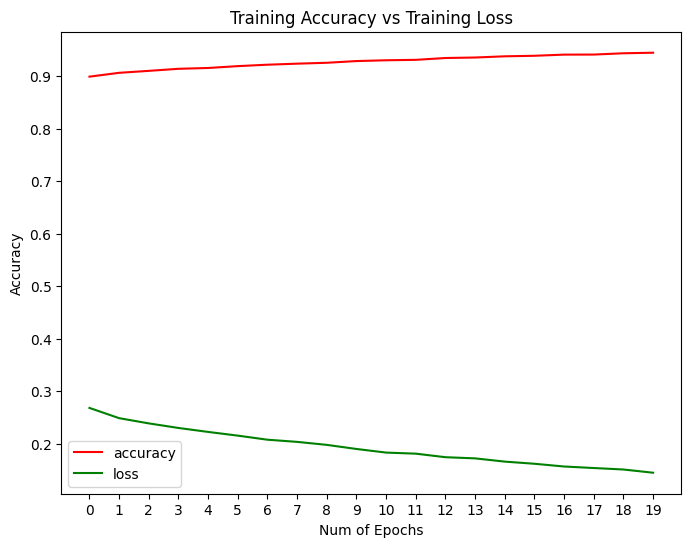

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['loss'],'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Training Loss")
plt.legend(['accuracy','loss'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image
im = Image.open('/content/drive/MyDrive/Colab Notebooks/imagenes/prendas/p1.png')

#  Diseña varias RNP con distintas capas y parámetros.

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import multiprocessing

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Que tendrán correspondencia con las siguientes clases ya traducidas.
class_names = ['Camiseta/top', 'Pantalón', 'Jersey', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Botín']

for i in range(10):
  print("Clase ",i,": ",class_names[i],sep="")

Clase 0: Camiseta/top
Clase 1: Pantalón
Clase 2: Jersey
Clase 3: Vestido
Clase 4: Abrigo
Clase 5: Sandalia
Clase 6: Camisa
Clase 7: Zapatilla
Clase 8: Bolso
Clase 9: Botín


In [ ]:
# Normalizamos las muestras
train_images = train_images/255.0
test_images = test_images/255.0

# Diseña varias RNP con distintas capas y parámetros.

En este apartado he diseñado 4 funciones con el fin de ir entrenando diferentes modelos en paralelo. Los resultados han sido bastante interesantes, como por ejemplo, con 10 capas y cada una de ellas con 1 neurona tiene un porcentaje de acierto del 100% pero una perdida del 2.3.

In [ ]:
# Función para entrenar un modelo con diferentes épocas y perceptrones
def entrenar_epocas_perceptrones(epocas, perceptrones, queue):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(perceptrones, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(train_images, train_labels, batch_size=64, epochs=epocas, validation_split=0.2, verbose=0)
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
    queue.put([epocas, perceptrones, test_acc, test_loss])  # Enviar resultados a la cola

# Función principal para crear modelos con épocas y perceptrones en paralelo
def crear_modelo_epocas_perceptrones():
    df = pd.DataFrame(columns=["epocas", "perceptrones", "porcentaje_acierto", "porcentaje_fallo"])
    queue = multiprocessing.Queue()
    processes = []

    for epocas in range(1, 11):
        for perceptrones in range(1, 130, 10):
            process = multiprocessing.Process(target=entrenar_epocas_perceptrones, args=(epocas, perceptrones, queue))
            processes.append(process)
            process.start()

    # Esperar a que terminen los procesos
    for process in processes:
        process.join()

    # Recuperar resultados de la cola
    while not queue.empty():
        df.loc[len(df)] = queue.get()

    return df

# Función para entrenar un modelo con diferentes capas ocultas y perceptrones
def entrenar_capas_perceptrones(capas, perceptrones, queue):
    capas_ocultas = [keras.layers.Dense(perceptrones, activation='relu') for _ in range(capas)]
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        *capas_ocultas,
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(train_images, train_labels, batch_size=64, epochs=4, validation_split=0.2, verbose=0)
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
    queue.put([capas, perceptrones, test_acc, test_loss])  # Enviar resultados a la cola

# Función principal para crear modelos con capas ocultas y perceptrones en paralelo
def crear_modelo_capas_ocultas_perceptrones():
    df = pd.DataFrame(columns=["capas", "perceptrones", "porcentaje_acierto", "porcentaje_fallo"])
    queue = multiprocessing.Queue()
    processes = []

    for capas in range(1, 11):
        for perceptrones in range(1, 130, 10):
            process = multiprocessing.Process(target=entrenar_capas_perceptrones, args=(capas, perceptrones, queue))
            processes.append(process)
            process.start()

    # Esperar a que terminen los procesos
    for process in processes:
        process.join()

    # Recuperar resultados de la cola
    while not queue.empty():
        df.loc[len(df)] = queue.get()

    return df

# Ejecución
df_epocas_perceptrones = crear_modelo_epocas_perceptrones()

df_capas_perceptrones = crear_modelo_capas_ocultas_perceptrones()



In [ ]:
df_epocas_perceptrones.to_excel("/content/epocas_perceptrones.xlsx", sheet_name="epocas_perceptrones")
df_capas_perceptrones.to_excel("/content/capas_ocultas_perceptrones.xlsx", sheet_name="capas_ocultas_perceptrones")

# Representa graficamente los resultados de los modelos probados.
Es dificil de volver a probar los resultados, ya que ha tardado alrededor de 30 minutos. A partir del dataframe que he conseguido guardar, voy a representar gráficamente los resultados de los mejores resultados.

### 4 mejores modelos con epocas fijas en 4

Epoch 1/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7386 - loss: 0.7620 - val_accuracy: 0.8360 - val_loss: 0.4488
Epoch 2/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8538 - loss: 0.4043 - val_accuracy: 0.8618 - val_loss: 0.3831
Epoch 3/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8707 - loss: 0.3548 - val_accuracy: 0.8743 - val_loss: 0.3528
Epoch 4/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8798 - loss: 0.3248 - val_accuracy: 0.8792 - val_loss: 0.3338
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8702 - loss: 0.3588
Test accuracy:  0.8694999814033508
Epoch 1/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6721 - loss: 0.8635 - val_accuracy: 0.8497 - val_loss: 0.4304
Epoch 2/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8462 - loss: 0.4256 - val_accuracy: 0.8458 - val_loss: 0.4189
Epoch 3/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8610 - loss: 0.3839 - val_accuracy: 0.8559 - val_loss: 0.4045


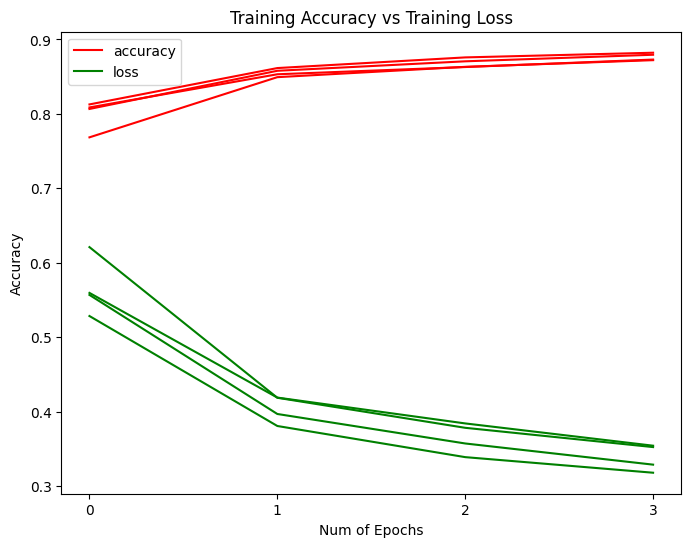

In [ ]:
for [capas, perceptrones] in [[2, 81], [10, 121], [1, 81], [2, 111]]:

  capas_ocultas = [keras.layers.Dense(perceptrones, activation='relu') for _ in range(capas)]


  model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    *capas_ocultas,
    keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer= 'Adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(train_images,train_labels,
                      batch_size= 64,
                      epochs= 4,
                      validation_split=0.2
                    )

  test_loss,test_acc = model.evaluate(test_images,test_labels)

  print('Test accuracy: ', test_acc)

  plt.figure(0)
  plt.plot(history.history['accuracy'],'r')
  plt.plot(history.history['loss'],'g')
  plt.xticks(np.arange(0, 4, 1.0))
  plt.rcParams['figure.figsize'] = (8, 6)
  plt.xlabel("Num of Epochs")
  plt.ylabel("Accuracy")
  plt.title("Training Accuracy vs Training Loss")
  plt.legend(['accuracy','loss'])


### 4 mejores modelos con capas ocultas fijas en 1

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7607 - loss: 0.7028 - val_accuracy: 0.8519 - val_loss: 0.4227
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8558 - loss: 0.4070 - val_accuracy: 0.8566 - val_loss: 0.3942
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8708 - loss: 0.3596 - val_accuracy: 0.8670 - val_loss: 0.3697
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8791 - loss: 0.3305 - val_accuracy: 0.8759 - val_loss: 0.3497
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8875 - loss: 0.3093 - val_accuracy: 0.8698 - val_loss: 0.3558
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8938 - loss: 0.2883 - val_accuracy: 0.8785 - val_loss: 0.3329
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8996 - loss: 0.2733 - val_accuracy: 0.8748 - val_loss: 0.3525
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8990 - loss: 0.2758 - val_accuracy: 0

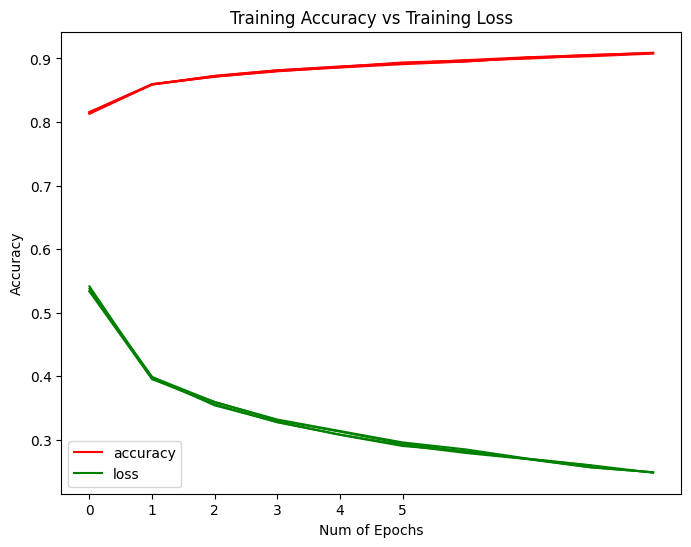

In [ ]:
for [epocas, perceptrones] in [[10, 121], [10, 81], [10, 101], [9, 111]]:

  model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer= 'Adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(train_images,train_labels,
                      batch_size= 64,
                      epochs= epocas,
                      validation_split=0.2
                    )

  test_loss,test_acc = model.evaluate(test_images,test_labels)

  print('Test accuracy: ', test_acc)

  plt.figure(0)
  plt.plot(history.history['accuracy'],'r')
  plt.plot(history.history['loss'],'g')
  plt.xticks(np.arange(0, 6, 1.0))
  plt.rcParams['figure.figsize'] = (8, 6)
  plt.xlabel("Num of Epochs")
  plt.ylabel("Accuracy")
  plt.title("Training Accuracy vs Training Loss")
  plt.legend(['accuracy','loss'])


# Prueba el mejor de los modelos con datos reales.

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from google.colab import drive
import cv2
import os

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

drive.mount("/content/drive")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Mounted at /content/drive


In [ ]:
# Que tendrán correspondencia con las siguientes clases ya traducidas.
class_names = ['Camiseta/top', 'Pantalón', 'Jersey', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Botín']

for i in range(len(class_names)):
  print("Clase ",i,": ",class_names[i],sep="")

Clase 0: Camiseta/top
Clase 1: Pantalón
Clase 2: Jersey
Clase 3: Vestido
Clase 4: Abrigo
Clase 5: Sandalia
Clase 6: Camisa
Clase 7: Zapatilla
Clase 8: Bolso
Clase 9: Botín


In [ ]:
# Normalizamos las muestras
train_images = train_images/255.0
test_images = test_images/255.0

Este es el caso de los anteriores el cuál me daba mejor resultado.

In [ ]:

modelo1 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    *[keras.layers.Dense(121, activation='relu') for _ in range(10)],
    keras.layers.Dense(10, activation='softmax')
])

modelo1.compile(optimizer= 'Adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history = modelo1.fit(train_images,train_labels,
                    batch_size= 64,
                    epochs = 10,
                    validation_split=0.2
                  )

test_loss,test_acc = modelo1.evaluate(test_images,test_labels)

print('Test accuracy: ', test_acc)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.6970 - loss: 0.8341 - val_accuracy: 0.8372 - val_loss: 0.4607
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8424 - loss: 0.4307 - val_accuracy: 0.8390 - val_loss: 0.4553
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8617 - loss: 0.3798 - val_accuracy: 0.8625 - val_loss: 0.3840
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8717 - loss: 0.3529 - val_accuracy: 0.8544 - val_loss: 0.4275
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8787 - loss: 0.3408 - val_accuracy: 0.8648 - val_loss: 0.3902
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8868 - loss: 0.3150 - val_accuracy: 0.8672 - val_loss: 0.3699
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8924 - loss: 0.2991 - val_accuracy: 0.8756 - val_loss: 0.3455
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8942 - loss: 0.2946 - val_acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


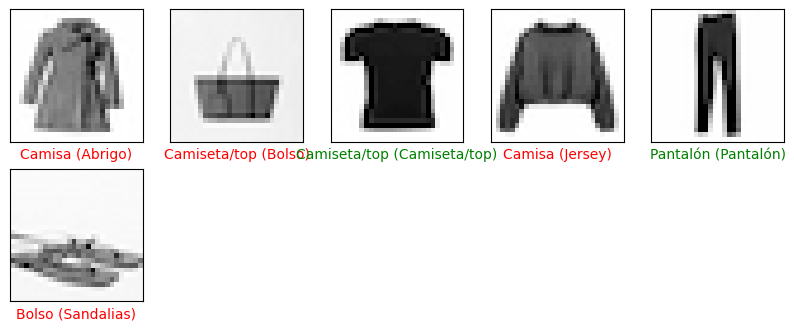

In [ ]:
imagenes = ["Abrigo", "Bolso", "Camiseta/top", "Jersey", "Pantalón", "Sandalias"]

plt.figure(figsize=(10,10))
for i in range(6):
  ruta = f"/content/drive/MyDrive/IABD/PIA/Tema 3/redes neuronales/imagenes/060{i}.jpg"

  imagen = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)

  imagen = 255 - imagen

  img_escala = imagen / 255.0
  img_escala = img_escala.reshape(1, 28, 28, 1)



  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(imagen, cmap=plt.cm.binary)
  predicted_label = np.argmax(modelo1.predict(img_escala))

  true_label = imagenes[i]

  color = 'green' if class_names[predicted_label] == true_label else 'red'

  plt.xlabel("{} ({})".format(class_names[predicted_label],
                              true_label), color=color)

Aunque en el ejemplo anterior he mostrado el modelo que mejor resultado me ha dado con las pruebas anteriores. Ahora me he propuesto a ir probando con otros datos, ya sean, perceptrones, capas y épocas.

In [ ]:
modelo2 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    *[keras.layers.Dense(perceptrones, activation='relu') for perceptrones in [121, 119, 117, 100, 95, 80, 50]],
    keras.layers.Dense(10, activation='softmax')
])

modelo2.compile(optimizer= 'Adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history = modelo2.fit(train_images,train_labels,
                    batch_size= 64,
                    epochs = 8,
                    validation_split=0.2
                  )

test_loss,test_acc = modelo2.evaluate(test_images,test_labels)

print('Test accuracy: ', test_acc)


Epoch 1/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.6875 - loss: 0.8391 - val_accuracy: 0.8167 - val_loss: 0.4964
Epoch 2/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8515 - loss: 0.4088 - val_accuracy: 0.8659 - val_loss: 0.3734
Epoch 3/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8682 - loss: 0.3570 - val_accuracy: 0.8627 - val_loss: 0.3812
Epoch 4/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8780 - loss: 0.3380 - val_accuracy: 0.8592 - val_loss: 0.3962
Epoch 5/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8841 - loss: 0.3159 - val_accuracy: 0.8712 - val_loss: 0.3510
Epoch 6/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8903 - loss: 0.3012 - val_accuracy: 0.8827 - val_loss: 0.3363
Epoch 7/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8949 - loss: 0.2846 - val_accuracy: 0.8710 - val_loss: 0.3415
Epoch 8/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8971 - loss: 0.2773 - val_accuracy: 0.8843 -

Voy a entrenar un modelo de RNP especializado en calzados. Si nos fijamos en el calzado, cuando se equivoca a veces pone que es bolso. Otro error que me he dado cuenta es que cuando entrenamos al modelo del calzado, las punta del calzado está a mirando hacia la izquierda mientras que las imagenes que le paso la punta mira hacia la derecha, por eso lo que he relizado en el código es obtener su imagen espejo. Aunque la mejora no ha sido significativa porque las imágenes que se usan para el entrenamiento no son del todo "realistas", se ha consiguido predecir una más en el conjunto del calzado.

In [ ]:
indices_train = [indice for indice, elemento in enumerate(train_labels) if elemento == 5 or elemento == 7  or elemento == 9]
img_calzado = train_images[indices_train]

etiqueta_calzado = train_labels[indices_train]

indices_test = [indice for indice, elemento in enumerate(test_labels) if elemento == 5 or elemento == 7  or elemento == 9]

img_test_calzado = test_images[indices_test]

etiqueta_test_calzado = test_labels[indices_test]


In [ ]:
modelo_calzado = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    *[keras.layers.Dense(perceptrones, activation='relu') for perceptrones in [121, 119, 117, 100, 95, 80, 50]],
    keras.layers.Dense(10, activation='softmax')
])

modelo_calzado.compile(optimizer= 'Adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])



history = modelo_calzado.fit(img_calzado,etiqueta_calzado,
                    batch_size= 32,
                    epochs = 4,
                    validation_split=0.10 # lo pongo a 10 porque no hay demasiadas imagenes
                  )

test_loss,test_acc = modelo_calzado.evaluate(img_test_calzado,etiqueta_test_calzado)

print('Test accuracy calzado: ', test_acc)

Epoch 1/4
507/507 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7735 - loss: 0.6101 - val_accuracy: 0.9322 - val_loss: 0.1881
Epoch 2/4
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9417 - loss: 0.1644 - val_accuracy: 0.9378 - val_loss: 0.1765
Epoch 3/4
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9521 - loss: 0.1353 - val_accuracy: 0.9450 - val_loss: 0.1683
Epoch 4/4
507/507 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9552 - loss: 0.1239 - val_accuracy: 0.9506 - val_loss: 0.1499
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9576 - loss: 0.1438
Test accuracy calzado:  0.9539999961853027


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


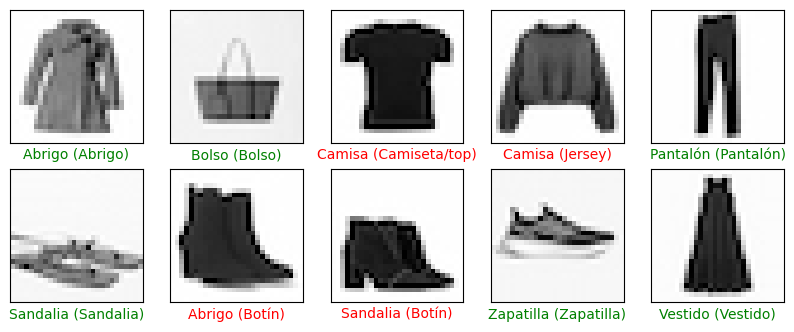

In [ ]:
img_etiqueta = ["Abrigo", "Bolso", "Camiseta/top", "Jersey", "Pantalón", "Sandalia", "Botín", "Botín", "Zapatilla", "Vestido"]



ruta = "/content/drive/MyDrive/IABD/PIA/Tema 3/redes neuronales/imagenes/"
ficheros = [f for f in os.listdir(ruta) if os.path.isfile(os.path.join(ruta, f))]


plt.figure(figsize=(10,10))
for i in range(len(ficheros)):

  fichero = os.path.join(ruta, ficheros[i])

  imagen = cv2.imread(fichero, cv2.IMREAD_GRAYSCALE)

  imagen = 255 - imagen

  img_escala = imagen / 255.0
  img_escala = img_escala.reshape(1, 28, 28, 1)



  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(imagen, cmap=plt.cm.binary)
  predicted_label = np.argmax(modelo2.predict(img_escala))

  true_label = img_etiqueta[i]

  if class_names[predicted_label] == true_label:
    color = 'green'

  elif class_names[predicted_label] == "Bolso":
    img_escala_sin_batch = img_escala.squeeze(axis=0)
    img_espejo = cv2.flip(img_escala_sin_batch, 1)
    predicted_label = np.argmax(modelo_calzado.predict(img_escala))

    color = 'green' if class_names[predicted_label] == true_label else 'red'

  else:

    color = 'red'


  plt.xlabel("{} ({})".format(class_names[predicted_label],
                              true_label), color=color)

Test accuracy:  0.8830000162124634 --> [128, 110, 90, 80, 64, 56, 56, 56, 30] |  epocas: 15 | aciertos: 2 /6

Test accuracy:  0.8694000244140625 --> [500, 400, 300, 200, 100, 50] | epocas: 8 | aciertos: 3 / 10 --> Conclusión: más perceptrone por capa no significa mejores resultados.

Test accuracy:  0.8712999820709229 --> [121, 119, 117, 100, 95, 80, 50] | epocas: 8 | aciertos: 5 / 10 --> Conclusión: menos perceptrones por capa puede dar mejor resultados.

Test accuracy:  0.8564000129699707 --> [121, 119, 117, 115, 113, 111, 109, 107, 105, 103, 101] | epocas: 8 | aciertos: 2 / 10 --> Conclusión: más capas ocultas no es identificativo de mejoría.

Test accuracy:  0.8707000017166138 | Test accuracy calzado:  0.9473333358764648 --> [121, 119, 117, 100, 95, 80, 50] | epocas: 8 --> aciertos 6 / 10 --> Conclusión: se puede realizar varios modelos, unos básicos y otros especializados.



Pongo las épocas a 8 porque si nos fijamos en el val_acurracy es cuando empieza a disminuir. Además, aunque en la época 10 vuelva a subir no dá mejor resultados.
